In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
words = open('names.txt','r').read().splitlines()
words

['piotr',
 'emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery'

In [5]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [6]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [7]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [28]:
N = torch.zeros((27,27), dtype=torch.int64)

In [29]:
for w in words:
    chs = ['.'] + list(w) +  ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1


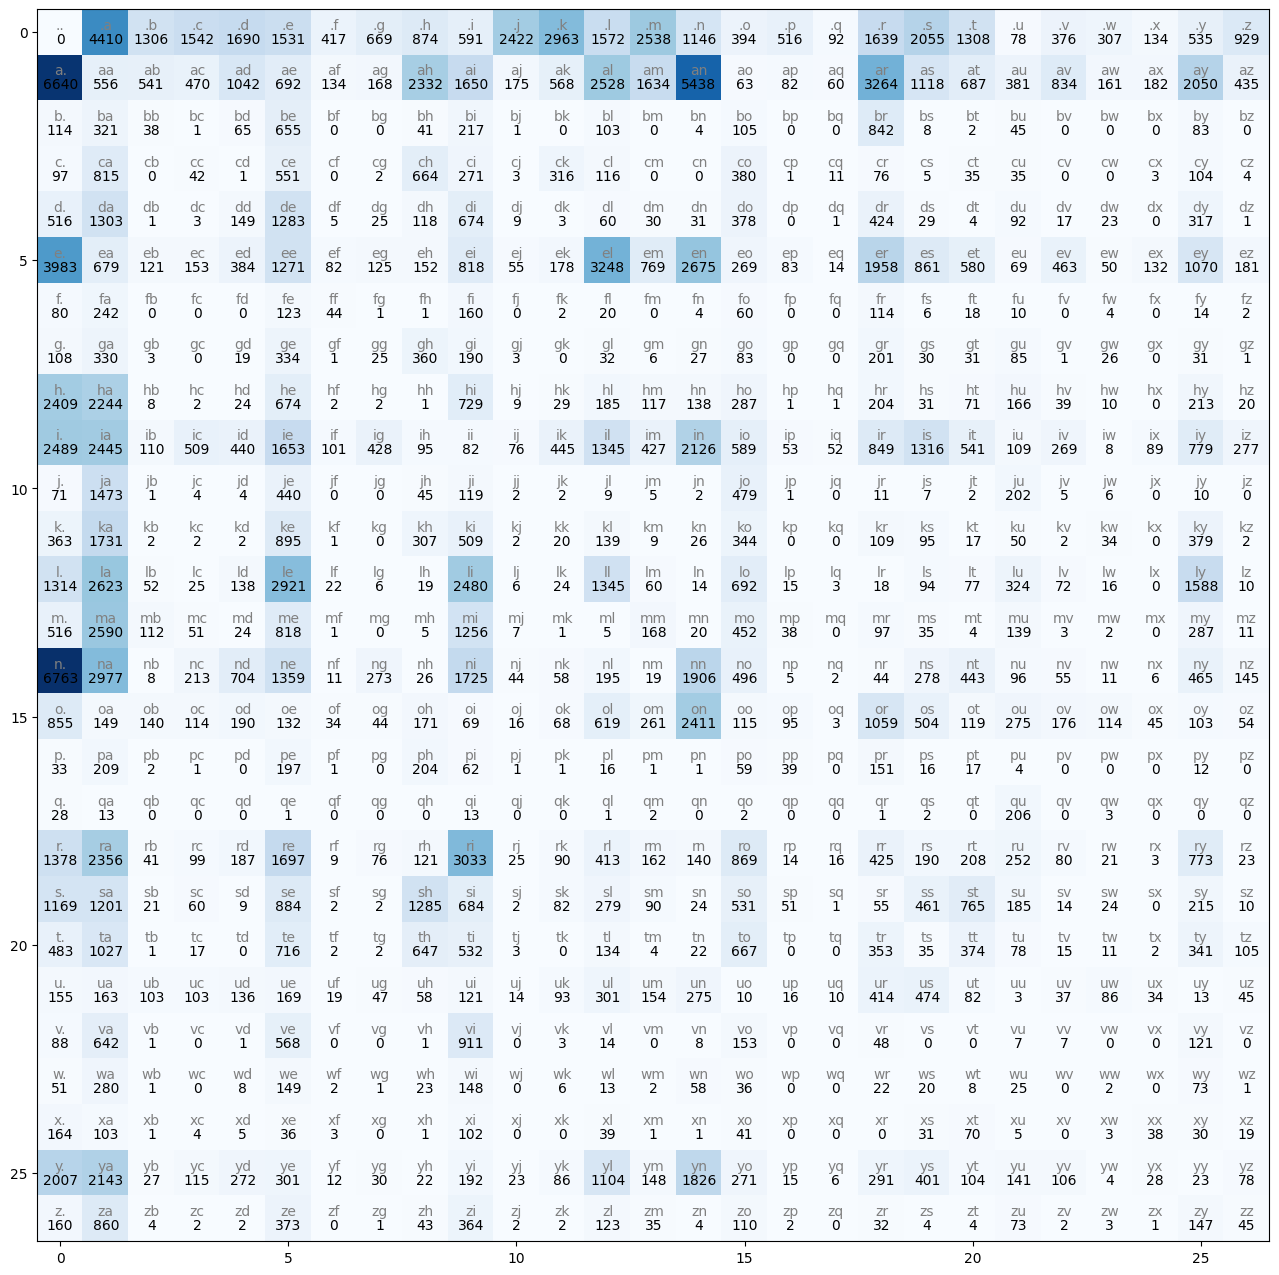

In [31]:
plt.figure(figsize=(16,16))
plt.imshow(N,cmap="Blues")
for i in range(27):
    for j in range(27):
        ch = itos[i] + itos[j]
        plt.text(j,i,ch,ha='center',va='bottom',color='grey')
        plt.text(j,i,N[i,j].item(),ha='center',va='top')
        

In [35]:
P = (N+1).float()
P /= P.sum(1,keepdims = True)
P[0].sum()

tensor(1.0000)

In [39]:
# calculating loss function
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        log = torch.log(prob)
       # print(log)
        log_likelihood += log
        n+=1
nll = -log_likelihood
nll /= n
print(f'nll={nll}')

nll=2.45442533493042


In [57]:
#samples from probability distribution
g = torch.Generator().manual_seed(694202137)
for k in range(5):
    out =[]
    ix=0
    while True:
        p = P[ix]
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        char = itos[ix]
        out.append(char)
        if ix == 0:
            break
    print(''.join(out))
        

jouilmasmianah.
maivetamerehvero.
kamiobyan.
kaimi.
a.


In [48]:
#Training set
ys,xs = [],[]
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
num


228152

In [61]:
xenc = F.one_hot(xs,num_classes=27).float()
W = torch.rand(size=(27,27),generator=g,dtype=torch.float32,requires_grad = True)

In [62]:
W

tensor([[0.1138, 0.9818, 0.2022, 0.2711, 0.5062, 0.7087, 0.8163, 0.1562, 0.5979,
         0.4885, 0.3673, 0.8810, 0.1468, 0.1938, 0.3417, 0.1127, 0.8233, 0.6258,
         0.7697, 0.2688, 0.1041, 0.4277, 0.9239, 0.4976, 0.8156, 0.9445, 0.9012],
        [0.5854, 0.7909, 0.6069, 0.5465, 0.3633, 0.0806, 0.8036, 0.7091, 0.8261,
         0.4876, 0.1444, 0.8413, 0.9792, 0.7223, 0.7942, 0.8958, 0.5964, 0.4981,
         0.7031, 0.7482, 0.8868, 0.6890, 0.0751, 0.0099, 0.8559, 0.4223, 0.6136],
        [0.3656, 0.3872, 0.4149, 0.9253, 0.7795, 0.4455, 0.7460, 0.0152, 0.3097,
         0.2305, 0.6054, 0.1754, 0.6115, 0.6627, 0.9692, 0.9587, 0.6876, 0.5825,
         0.3169, 0.9404, 0.3571, 0.2279, 0.7945, 0.1282, 0.9933, 0.6274, 0.8364],
        [0.7041, 0.5378, 0.7077, 0.6666, 0.0741, 0.7468, 0.8670, 0.4058, 0.9426,
         0.3565, 0.7205, 0.4741, 0.9942, 0.1529, 0.4370, 0.4742, 0.3675, 0.0334,
         0.6648, 0.6915, 0.8933, 0.1694, 0.6675, 0.8781, 0.2230, 0.7040, 0.8138],
        [0.3052, 0.4232,

In [73]:
for k in range (500):
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1,keepdims = True)

    loss = -probs[torch.arange(num),ys].log().mean() + 0.01*(W**2).mean()
    W.grad = None
    loss.backward()
    W.data += -50*W.grad

    print (k,loss.item())
    

0 2.487633228302002
1 2.4875357151031494
2 2.487440586090088
3 2.487346887588501
4 2.487255573272705
5 2.487166166305542
6 2.4870786666870117
7 2.486992835998535
8 2.4869091510772705
9 2.4868266582489014
10 2.486746311187744
11 2.4866673946380615
12 2.4865903854370117
13 2.4865148067474365
14 2.486440420150757
15 2.48636794090271
16 2.4862966537475586
17 2.4862265586853027
18 2.4861581325531006
19 2.486090898513794
20 2.486025333404541
21 2.4859607219696045
22 2.4858973026275635
23 2.485835313796997
24 2.485774278640747
25 2.4857141971588135
26 2.4856555461883545
27 2.485597848892212
28 2.485541343688965
29 2.485485792160034
30 2.48543119430542
31 2.485377311706543
32 2.4853246212005615
33 2.4852731227874756
34 2.4852218627929688
35 2.4851722717285156
36 2.4851231575012207
37 2.485074996948242
38 2.485027551651001
39 2.484980821609497
40 2.4849350452423096
41 2.4848902225494385
42 2.4848458766937256
43 2.484802484512329
44 2.4847593307495117
45 2.48471736907959
46 2.484675645828247
47 

In [76]:
for k in range(5):
    out =[]
    ix = 0
    while True:
        x_curr = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = x_curr @ W
        counts = logits.exp()
        p = counts / counts.sum(1,keepdims = True)
       
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()

        char = itos[ix]
        out.append(char)
        if ix == 0:
            break
    print(''.join(out))

joraylqulleeamoelemsrar.
beuaynann.
krivu.
panarororiediadasitrdeay.
koh.
